In [1]:
"""
Session 2HW:
How does the time series of the low-vol index derived in class for Pharma compare to (a) equal-weighted Pharma index? (b) price-weighted Pharma index? Please plot three series together

1.For the equal-weighted index, I simply assign equal weights to all stocks in the portfolio and calculate the cumulative return series
2.For the price-weighted index, I determine the weights based on the most recent prices and calculate the cumulative return series
3.Then plot all three series (low volatility, equal-weighted, and price-weighted) together on the same graph to visualize and compare their performances over time
"""


'\nSession 2HW:\nHow does the time series of the low-vol index derived in class for Pharma compare to (a) equal-weighted Pharma index? (b) price-weighted Pharma index? Please plot three series together\n\n1.For the equal-weighted index, I simply assign equal weights to all stocks in the portfolio and calculate the cumulative return series\n2.For the price-weighted index, I determine the weights based on the most recent prices and calculate the cumulative return series\n3.Then plot all three series (low volatility, equal-weighted, and price-weighted) together on the same graph to visualize and compare their performances over time\n'

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
#plt.rcParams["figure.dpi"] = 100
#plt.rcParams["figure.ftickers = ["JNJ", "MRK", "PFE", "BMY", "CTLT", "LLY", "VTRS", "PRGO", "ZTS"]

[*********************100%%**********************]  9 of 9 completed


<Axes: title={'center': 'Pharma stocks'}, xlabel='Date'>

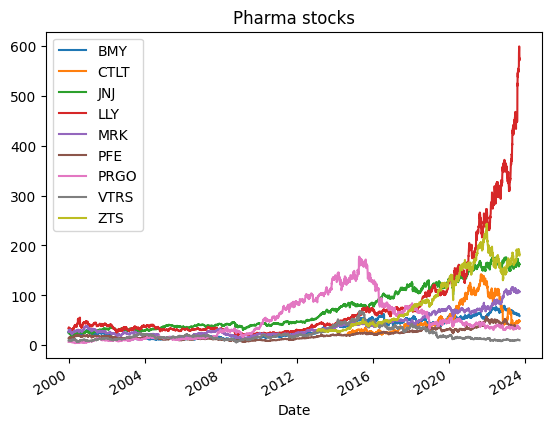

In [3]:
tickers = ["JNJ", "MRK", "PFE", "BMY", "CTLT", "LLY", "VTRS", "PRGO", "ZTS"]
dfPx = yf.download(" ".join(tickers), start="2000-01-01")["Adj Close"]
dfPx.plot(title="Pharma stocks")

<ipython-input-4-dbdceb3a28e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPx.fillna(method="ffill", limit=3, inplace=True)


<Axes: xlabel='Date'>

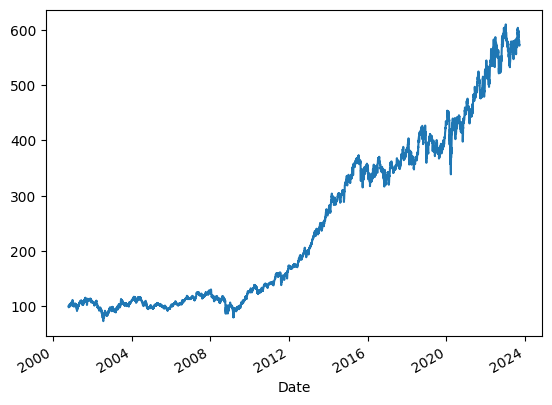

In [4]:
dfPx = dfPx.loc[:, [dfPx[[ii]].isna().sum().sum() < 100 for ii in dfPx.columns]]
dfPx.fillna(method="ffill", limit=3, inplace=True)
dfRets = dfPx.pct_change().dropna()
dfStds = dfRets.rolling(200).std().dropna()
dfW = 1 / dfStds.shift(1)
dfW = dfW.div(dfW.sum(axis=1), axis=0)
tsIndex = 100 * (1 + (dfW * dfRets).sum(axis=1)).cumprod()[dfW.index.min():]
tsIndex.plot()

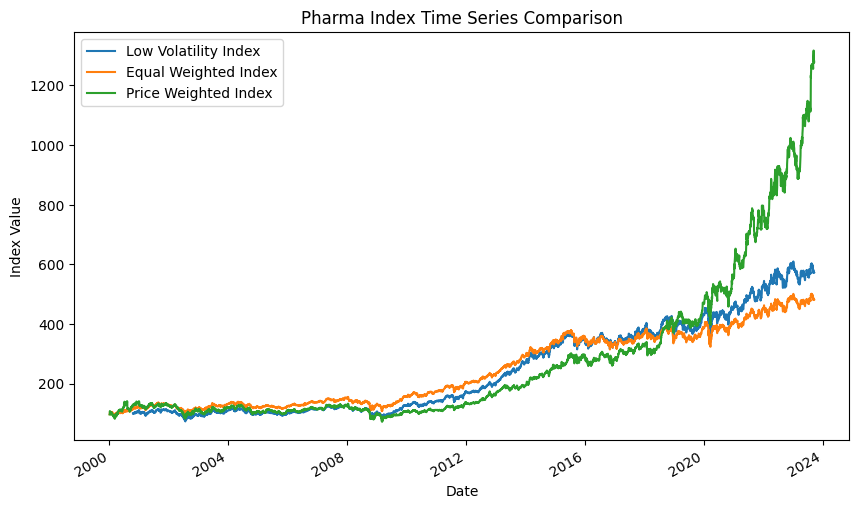

In [5]:

# Construct equal-weighted index
equal_weights = 1 / len(tickers)
equal_weighted_index = 100 * (1 + (equal_weights * dfRets).sum(axis=1)).cumprod()

# Construct price-weighted index
price_weights = dfPx.iloc[-1] / dfPx.iloc[-1].sum()
price_weighted_index = 100 * (1 + (price_weights * dfRets).sum(axis=1)).cumprod()

# Plot all three indices together
plt.figure(figsize=(10,6))
tsIndex.plot(label='Low Volatility Index')
equal_weighted_index.plot(label='Equal Weighted Index')
price_weighted_index.plot(label='Price Weighted Index')

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Pharma Index Time Series Comparison')
plt.legend()
plt.show()